In [3]:
pip install pyLDAvis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.9 MB/s eta 0:00:00


In [4]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from sklearn.manifold import TSNE
from transformers import BertTokenizer, pipeline
from gensim.utils import simple_preprocess
from IPython.core.display import display, HTML

In [3]:
#Loading the CSV file name has been changed to Nike.csv
df= pd.read_csv('/content/drive/MyDrive/Social Media And Web Analytics/Nike.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
#Checking for missing values and duplicate rows
missing_values = df.isnull().sum()
duplicate_rows = df.duplicated().sum()

missing_values, duplicate_rows

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(Name                0
 ReviewText          1
 DateOfExperience    2
 Location            3
 dtype: int64,
 2)

In [5]:
df.describe()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Name,ReviewText,DateOfExperience,Location
count,4602,4601,4600,4599
unique,4192,4577,1914,79
top,customer,Date of experience: 10 August 2020,10 August 2020,GB
freq,22,8,75,2245


In [6]:
#Removing rows where 'ReviewText' is missing
df = df[df['ReviewText'].notna()]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
#Imputing missing values with the mode imputation method
mode_date = df['DateOfExperience'].mode()[0]  # Gets the mode value
df['DateOfExperience'].fillna(mode_date, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-7-882c178e541c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DateOfExperience'].fillna(mode_date, inplace=True)


In [8]:
#Imputing location using mode imputation
mode_location = df['Location'].mode()[0]
df['Location'].fillna(mode_location, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
print(df.isnull().sum())

Name                0
ReviewText          0
DateOfExperience    0
Location            0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# Counting occurrenc of "Date of experience:" in ReviewText column
count_date_of_experience = df['ReviewText'].str.contains('Date of experience:', case=False, na=False).sum()
print(count_date_of_experience)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


137


In [11]:
#Replacing the "Date of experience:" by '[DATE]'
df['ReviewText'] = df['ReviewText'].str.replace('Date of experience: \d{1,2} \w+ \d{4}', '[DATE]', regex=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:2: DeprecationWarning: invalid escape sequence '\d'
<>:2: DeprecationWarning: invalid escape sequence '\d'
<ipython-input-11-e19cf34aee7d>:2: DeprecationWarning: invalid escape sequence '\d'
  df['ReviewText'] = df['ReviewText'].str.replace('Date of experience: \d{1,2} \w+ \d{4}', '[DATE]', regex=True)


In [12]:
#Creating function to clean text data
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)# Removing HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)# Removing special characters
    text = text.lower()# Converting to lowercase (Normalization)
    return text


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
#Cleaning the ReviewText column
df['ProcessedReviewText'] = df['ReviewText'].apply(clean_text)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
#Dataframe
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Name,ReviewText,DateOfExperience,Location,ProcessedReviewText
0,Barry Cox,Purchased a pair of NikeID AirMax 90’s a while...,01 May 2024,GB,purchased a pair of nikeid airmax s a while ba...
1,Paddy Coughlan,An absolute mess of a company. Ordered new tra...,30 April 2024,IE,an absolute mess of a company ordered new trai...
2,Alex Mellers,waited ages to speak to an agent after being s...,30 April 2024,GB,waited ages to speak to an agent after being s...
3,Charlene Alexander,I have ordered many times from the the store a...,08 April 2024,GB,i have ordered many times from the the store a...
4,Lukasz T.,Be aware when ordering online from Nike UK. My...,22 April 2024,GB,be aware when ordering online from nike uk my ...
...,...,...,...,...,...
4597,elke k,bought shoues there - fast delivery - good ser...,22 July 2014,DE,bought shoues there fast delivery good servi...
4598,Stensgaard,"Got a polo, but messed up the size, so had to ...",18 July 2014,DK,got a polo but messed up the size so had to re...
4599,Karin Conley,I love nikes but I miss the shox.,17 July 2014,US,i love nikes but i miss the shox
4600,ChiaraM,I bought a Fuel Band for my husband..very fast...,26 March 2014,US,i bought a fuel band for my husbandvery fast s...


In [15]:
#Removing stopwords
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_text = ' '.join(word for word in tokens if word not in stop_words)
    return filtered_text
df['ProcessedReviewText'] = df['ProcessedReviewText'].apply(remove_stopwords)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
#Saving the processed data
df.to_csv('/content/drive/MyDrive/Social Media And Web Analytics/Nike_Preprocessed.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
#Loading file
processed = pd.read_csv('/content/drive/MyDrive/Social Media And Web Analytics/Nike_Preprocessed.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
processed

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Name,ReviewText,DateOfExperience,Location,ProcessedReviewText
0,Barry Cox,Purchased a pair of NikeID AirMax 90’s a while...,01 May 2024,GB,purchased pair nikeid airmax back kept boxed q...
1,Paddy Coughlan,An absolute mess of a company. Ordered new tra...,30 April 2024,IE,absolute mess company ordered new trainers sen...
2,Alex Mellers,waited ages to speak to an agent after being s...,30 April 2024,GB,waited ages speak agent sent wrong item chat g...
3,Charlene Alexander,I have ordered many times from the the store a...,08 April 2024,GB,ordered many times store recently ordered cust...
4,Lukasz T.,Be aware when ordering online from Nike UK. My...,22 April 2024,GB,aware ordering online nike uk parcel wasnt del...
...,...,...,...,...,...
4596,elke k,bought shoues there - fast delivery - good ser...,22 July 2014,DE,bought shoues fast delivery good service shoes...
4597,Stensgaard,"Got a polo, but messed up the size, so had to ...",18 July 2014,DK,got polo messed size return didnt pay return s...
4598,Karin Conley,I love nikes but I miss the shox.,17 July 2014,US,love nikes miss shox
4599,ChiaraM,I bought a Fuel Band for my husband..very fast...,26 March 2014,US,bought fuel band husbandvery fast shipping pro...


In [19]:
print(processed.isnull().sum())


Name                   0
ReviewText             0
DateOfExperience       0
Location               0
ProcessedReviewText    0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
#Downloading VADER's lexicon
nltk.download('vader_lexicon')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [21]:
#SENTIMENT ANALYSIS Starts From Here
#Initializing VADER
sia = SentimentIntensityAnalyzer()

# Function for sentiment score
def get_sentiment(text):
    return sia.polarity_scores(text)['compound']

# 'ProcessedReviewText' is the column after proprocessing ReviewText column
processed['SentimentScore'] = processed['ProcessedReviewText'].apply(get_sentiment)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
#Checking if the 'SentimentScore' column is created
print(processed.head())


                 Name                                         ReviewText  \
0           Barry Cox  Purchased a pair of NikeID AirMax 90’s a while...   
1      Paddy Coughlan  An absolute mess of a company. Ordered new tra...   
2        Alex Mellers  waited ages to speak to an agent after being s...   
3  Charlene Alexander  I have ordered many times from the the store a...   
4           Lukasz T.  Be aware when ordering online from Nike UK. My...   

  DateOfExperience Location  \
0      01 May 2024       GB   
1    30 April 2024       IE   
2    30 April 2024       GB   
3    08 April 2024       GB   
4    22 April 2024       GB   

                                 ProcessedReviewText  SentimentScore  
0  purchased pair nikeid airmax back kept boxed q...          0.1359  
1  absolute mess company ordered new trainers sen...         -0.5574  
2  waited ages speak agent sent wrong item chat g...         -0.4767  
3  ordered many times store recently ordered cust...          0.6423  
4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
#Defining new threshold values for sentiment analysis
#ONLY ZERO IS NEUTRAL
positive_threshold = 0.01
negative_threshold = -0.01
# Function to categorize sentiment based on thresholds
def categorize_sentiment(score):
    if score > positive_threshold:
        return 'Positive'
    elif score < negative_threshold:
        return 'Negative'
    else:
        return 'Neutral'
# Appling the function to the SentimentScore column
processed['SentimentCategory'] = processed['SentimentScore'].apply(categorize_sentiment)
sentiment_counts = processed['SentimentCategory'].value_counts()
print(sentiment_counts)


SentimentCategory
Negative    2179
Positive    2013
Neutral      409
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-24-9ebfb90e7020>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


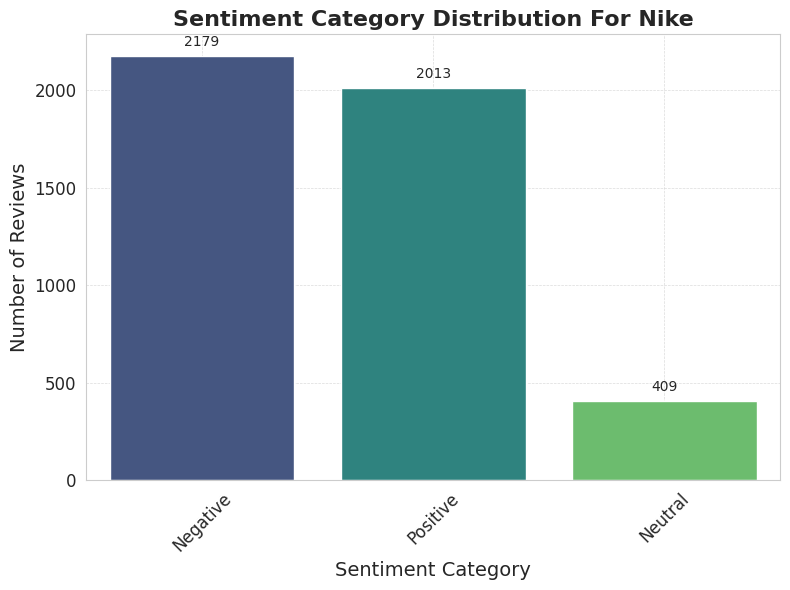

In [24]:
#Counting the number of occurrences of each sentiment category
sentiment_counts = processed['SentimentCategory'].value_counts()
#Creating a bar plot for the sentiment categories
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid") #white background
bar = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
#Adding a grid which may improve the readability
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
# Annotating the exact counts on top of each bar
for p in bar.patches:
    height = p.get_height()
    plt.annotate(f'{int(height)}',
                 (p.get_x() + p.get_width() / 2, height),
                 ha='center', va='center',
                 xytext=(0, 10),  # Vertical alignment
                 textcoords='offset points')
plt.title('Sentiment Category Distribution For Nike', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [25]:
#Removing rows 'SentimentScore' where null vales present
processed = processed.dropna(subset=['SentimentScore'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


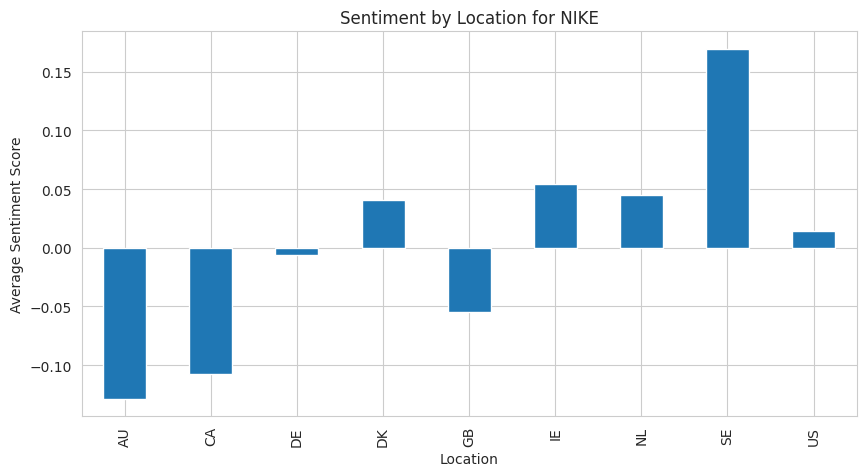

In [26]:
#Filtering locations with a minimum number of reviews to reduce clutter
min_reviews = 30  #Threshold OF 30 reviews minimum
location_counts = processed['Location'].value_counts()
filtered_locations = location_counts[location_counts >= min_reviews].index

#Including only these locations more than 30 reviews
filtered_processed = processed[processed['Location'].isin(filtered_locations)]
# Recalculating sentiments
filtered_location_sentiments = filtered_processed.groupby('Location')['SentimentScore'].mean()

#Ploting Sentiment by Location
filtered_location_sentiments.plot(kind='bar', figsize=(10, 5), title='Sentiment by Location for NIKE')
plt.ylabel('Average Sentiment Score')
plt.show()


In [27]:
#Filtering reviews by sentimentcategory
negative_reviews = processed[processed['SentimentCategory'] == 'Negative']['ProcessedReviewText']
positive_reviews = processed[processed['SentimentCategory'] == 'Positive']['ProcessedReviewText']

#Combining all negative reviews into a string
negative_text = " ".join(review for review in negative_reviews)

#Combining all positive reviews into a string
positive_text = " ".join(review for review in positive_reviews)

#Generating a word cloud image for negative reviews
negative_wordcloud = WordCloud(background_color='white', max_words=120, contour_color='steelblue', width=800, height=400).generate(negative_text)

#Generating a word cloud image for positive reviews
positive_wordcloud = WordCloud(background_color='white', max_words=120, contour_color='steelblue', width=800, height=400).generate(positive_text)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


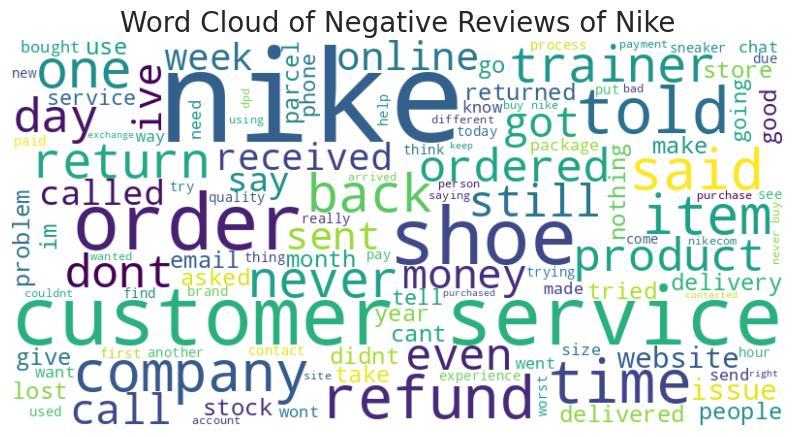

In [28]:
#Visualising the generated image for negative reviews
plt.figure(figsize=(10, 7))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Reviews of Nike', size=20)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


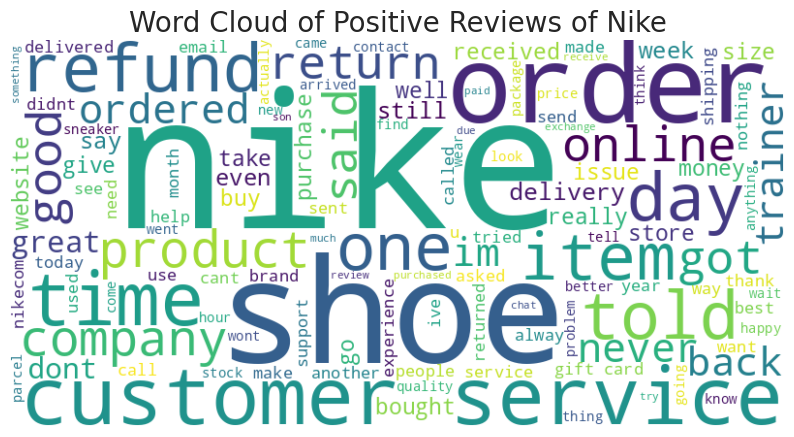

In [29]:
#Visualising the generated image for positive reviews
plt.figure(figsize=(10, 7))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Reviews of Nike', size=20)
plt.show()

In [30]:
processed['ProcessedReviewText']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       purchased pair nikeid airmax back kept boxed q...
1       absolute mess company ordered new trainers sen...
2       waited ages speak agent sent wrong item chat g...
3       ordered many times store recently ordered cust...
4       aware ordering online nike uk parcel wasnt del...
                              ...                        
4596    bought shoues fast delivery good service shoes...
4597    got polo messed size return didnt pay return s...
4598                                 love nikes miss shox
4599    bought fuel band husbandvery fast shipping pro...
4600    purchased gift card nikecomafter shopping site...
Name: ProcessedReviewText, Length: 4601, dtype: object

In [31]:
# Tokenizing the ProcessedReviewText into single words
processed['tokenized'] = processed['ProcessedReviewText'].apply(lambda x: simple_preprocess(x, deacc=True))  # deacc=True removes punctuations


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
# Creating a dictionary representation of the documents
dictionary = Dictionary(processed['tokenized'])
#Filtering extremes to limit the number of features
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
# Creating a bag-of-words model for each document
corpus = [dictionary.doc2bow(doc) for doc in processed['tokenized']]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
#Setting training parameters for Topic creation
num_topics = 10
chunksize = 2000
passes = 20
iterations = 400
eval_every = None

#Making an index to word dictionary
temp = dictionary[0]  #Loading dictonary
id2word = dictionary.id2token

#Training the model
model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
#Printing the Keyword in the 10 topics
topics = model.print_topics(num_words=10)
for topic in topics:
    print(topic)


(0, '0.029*"get" + 0.026*"time" + 0.025*"back" + 0.024*"money" + 0.018*"im" + 0.017*"dont" + 0.016*"shoes" + 0.012*"cant" + 0.011*"want" + 0.011*"go"')
(1, '0.027*"would" + 0.019*"told" + 0.017*"back" + 0.016*"said" + 0.016*"return" + 0.015*"refund" + 0.014*"could" + 0.014*"pair" + 0.014*"shoes" + 0.014*"store"')
(2, '0.055*"service" + 0.052*"customer" + 0.031*"order" + 0.019*"shipping" + 0.016*"time" + 0.015*"experience" + 0.014*"address" + 0.014*"online" + 0.013*"nikecom" + 0.013*"product"')
(3, '0.068*"shoes" + 0.035*"pair" + 0.026*"bought" + 0.019*"quality" + 0.015*"shoe" + 0.014*"new" + 0.014*"trainers" + 0.013*"running" + 0.013*"air" + 0.012*"buy"')
(4, '0.029*"buy" + 0.027*"products" + 0.027*"company" + 0.025*"never" + 0.016*"country" + 0.015*"support" + 0.015*"flag" + 0.013*"like" + 0.012*"people" + 0.012*"would"')
(5, '0.020*"customer" + 0.020*"refund" + 0.019*"card" + 0.019*"service" + 0.014*"gift" + 0.013*"order" + 0.011*"online" + 0.010*"still" + 0.010*"told" + 0.010*"chat"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
#Computing Coherence Score for accuracy
coherence_model_lda = CoherenceModel(model=model, texts=processed['tokenized'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)# Here, accuracy of the model is 0.4496958422003547 model is good to go


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.4496958422003547


In [36]:
# Setting the size of PyLDAvis output via IPython display configurations
display(HTML("<style>.output {width: 30%; height: 400px;}</style>"))
#Visualizing the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(vis)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


In [37]:
#Saving the visualizations
pyLDAvis.save_html(vis, 'NIKE_LDA.html')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
text_data = processed['ProcessedReviewText'].apply(lambda x: x.split())

#Training a Word2Vec model
model_w2v = Word2Vec(sentences=text_data, vector_size=100, window=5, min_count=1, workers=4)

#Function to create a document vector by averaging word vectors
def document_vector(doc):
    #Checkung words in the model's vocabulary
    doc = [word for word in doc if word in model_w2v.wv.index_to_key]
    if len(doc) == 0:
        return np.zeros(model_w2v.vector_size)  #Returning a zero vector if doc has no words in the model's vocabulary
    return np.mean(model_w2v.wv[doc], axis=0)
#Re-calculating document vectors
doc_vectors = np.array([document_vector(doc) for doc in text_data])



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
#K-Means CLUSTERING
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(doc_vectors)
clusters = kmeans.labels_
#Adding cluster labels
processed['Cluster'] = clusters
print(processed.head(8))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                 Name                                         ReviewText  \
0           Barry Cox  Purchased a pair of NikeID AirMax 90’s a while...   
1      Paddy Coughlan  An absolute mess of a company. Ordered new tra...   
2        Alex Mellers  waited ages to speak to an agent after being s...   
3  Charlene Alexander  I have ordered many times from the the store a...   
4           Lukasz T.  Be aware when ordering online from Nike UK. My...   
5        Pentti Jurva  I did order custom made pair of dunks and pair...   
6        Mona Zeytter  Imagine that Nike in Dubai is not willing to r...   
7      Mark Armstrong  Nike Air Vapourmax plus. Really thin material ...   

  DateOfExperience Location  \
0      01 May 2024       GB   
1    30 April 2024       IE   
2    30 April 2024       GB   
3    08 April 2024       GB   
4    22 April 2024       GB   
5    30 April 2024       FI   
6    23 April 2024       AE   
7    24 April 2024       GB   

                                 Pr

In [40]:
#Counting the number of points in each cluster
cluster_counts = processed['Cluster'].value_counts()
print(cluster_counts)

Cluster
4    1556
0    1314
3     897
2     672
1     162
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4601 samples in 0.001s...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[t-SNE] Computed neighbors for 4601 samples in 0.361s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4601
[t-SNE] Computed conditional probabilities for sample 2000 / 4601
[t-SNE] Computed conditional probabilities for sample 3000 / 4601
[t-SNE] Computed conditional probabilities for sample 4000 / 4601
[t-SNE] Computed conditional probabilities for sample 4601 / 4601
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.912422
[t-SNE] KL divergence after 1000 iterations: 1.287305


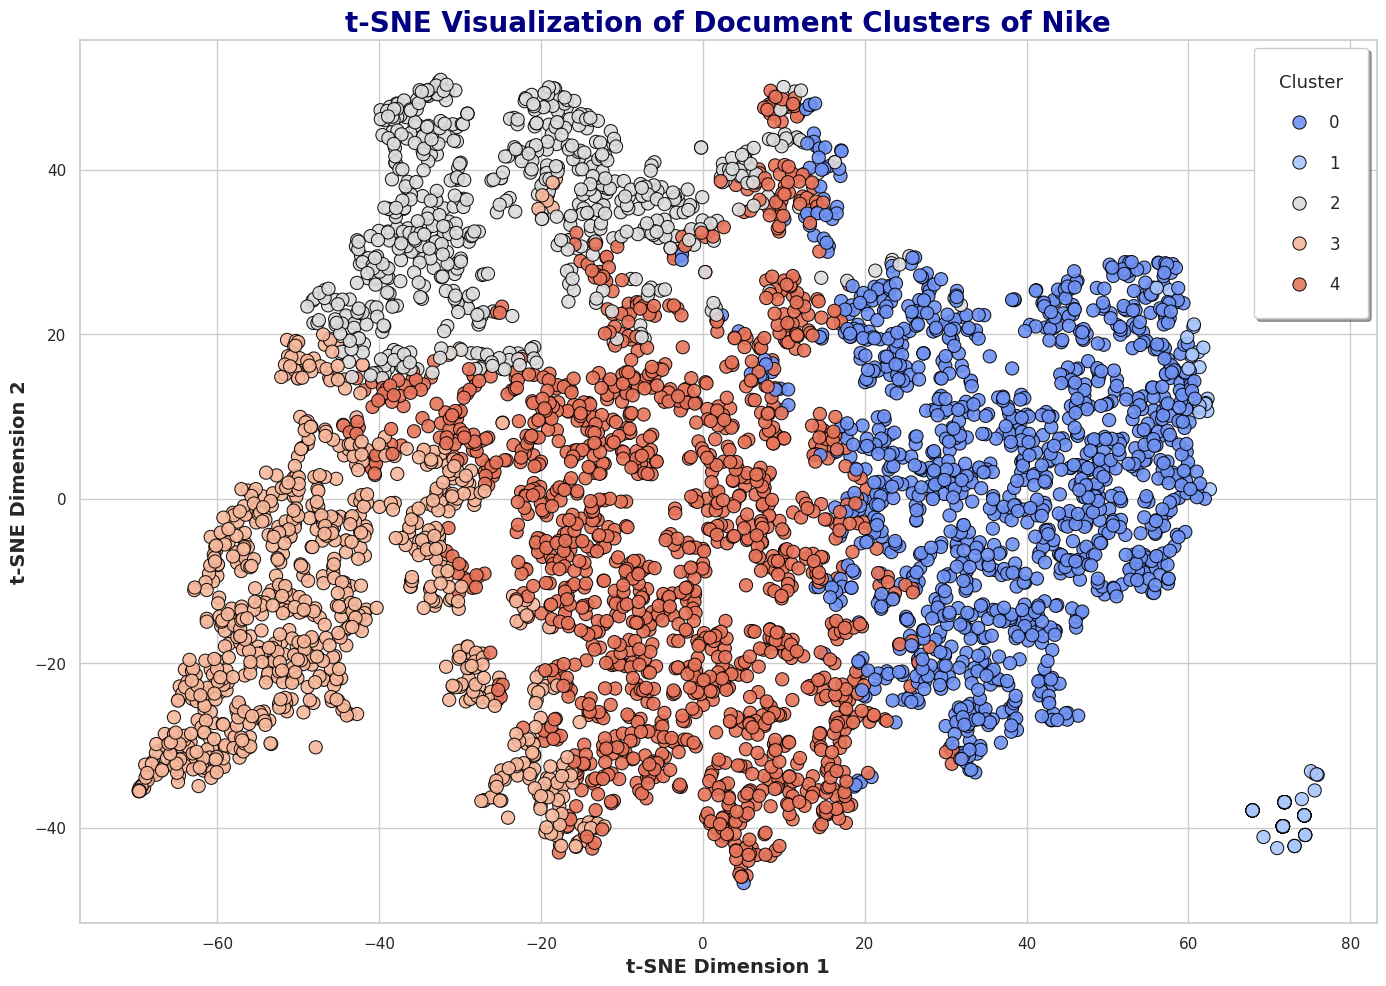

In [41]:
#t-SNE for Dimensionality Reduction
#Reducing dimensions
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000, random_state=42)  # Increased iterations for better stability
tsne_results = tsne.fit_transform(doc_vectors)

#Ploting settings
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")#white background

#Creating scatter plot
palette = sns.color_palette("coolwarm", len(set(processed['Cluster'])))  # Change palette for better color visibility
scatter = sns.scatterplot(
    x=tsne_results[:, 0], y=tsne_results[:, 1],
    hue=processed['Cluster'],
    palette=palette,
    legend="full",
    alpha=0.9,
    edgecolor='black',
    s=90 #marker size
)
#legends
plt.legend(title='Cluster', title_fontsize='13', labelspacing=1.35, borderpad=1.5, loc='best', fontsize='12', frameon=True, shadow=True)
plt.title('t-SNE Visualization of Document Clusters of Nike', fontsize=20, fontweight='bold', color='navy')
plt.xlabel('t-SNE Dimension 1', fontsize=14, fontweight='bold')
plt.ylabel('t-SNE Dimension 2', fontsize=14, fontweight='bold')
plt.grid(True)
plt.tight_layout(pad=1)
plt.show()


In [42]:
#Loading pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased')

#Loading a pre-trained and fine-tuned sentiment analysis pipeline
nlp = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")
def analyze_sentiment(text):
    #Tokenizing and handling segments ensuring each is under the maximum length
    encoded_input = tokenizer(text, truncation=True, max_length=512, return_tensors="pt")
    output = nlp.model(**encoded_input)
    #Decoding the output to get sentiment
    sentiment = nlp.model.config.id2label[output.logits.argmax(-1).item()]
    return sentiment
processed['sentiment'] = processed['ProcessedReviewText'].apply(analyze_sentiment)




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [43]:
print(processed[['ProcessedReviewText','SentimentScore' ,'SentimentCategory',  'sentiment', 'Cluster' ]].head())

                                 ProcessedReviewText  SentimentScore  \
0  purchased pair nikeid airmax back kept boxed q...          0.1359   
1  absolute mess company ordered new trainers sen...         -0.5574   
2  waited ages speak agent sent wrong item chat g...         -0.4767   
3  ordered many times store recently ordered cust...          0.6423   
4  aware ordering online nike uk parcel wasnt del...         -0.3182   

  SentimentCategory sentiment  Cluster  
0          Positive   2 stars        3  
1          Negative    1 star        4  
2          Negative    1 star        0  
3          Positive   5 stars        4  
4          Negative    1 star        0  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
#Saving the  data with sentiments
processed.to_csv('Forcomparison_Nike.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
